# 2020-09-17_EcN_Sensors_ALL_TFs_M9_300minInduction_replicate1

Brief experiment description:

* OD normalized cells for induction step
* Testing all sensor promoters for paper, replicate 1
* Used new inducer stocks for aTc, Nar, OHC14, Van, Cuma (250X in Adam's specified solvents)
    - appeared to be toxicity from the amount of DMF and EtOH being added with 250X stocks for atC, OHC14, Van, Cuma. Could have also been something weird residual in the plates, but I don't think so
* All strains are sequence confirmed

Experimental variables:
* Circuit landing pad repressor
    * determined by strain number
* induction of YFP expression
    * determined by concentration of inducer

Notes on experiment:

* FITC-A is the output channel (YFP)

### Strains

#### Experiment
| strain number | parent strain | sensor promoter               |       inducer |
|---------------|---------------|-------------------------------|---------------|
| AJT269  | EcN | P<sub>tac</sub>      |       IPTG |
| AJT270  | EcN | P<sub>BAD_mc1</sub>      |       Ara |
| AJT273  | EcN | P<sub>Tet_org</sub>      |       aTc |
| AJT274  | EcN | P<sub>Ttg</sub>      |       Nar |
| AJT275  | EcN | P<sub>Cin</sub>      |       OHC14 |
| AJT276  | EcN | P<sub>Van</sub>      |       Van |
| AJT278  | EcN | P<sub>CymRC</sub>      |       Cuma |

#### Controls
| parent_strain | description               |       strain number |
|---------------|------------|---------------------|
| EcN  | all landing pads, sensor integrated, others empty, abx included      |       AJT206 |
| EcN  | all landing pads, sensor + const. YFP on circuit, abx included      |       AJT280 |

### Protocol

 - Overnight in M9 + kan
 - M9
     * Dilute 1:150 in 500 uL deep-well plate, grow for 1.5 hours
     * Dilute to OD = 0.00006667 into 500 uL in deep-well plate with inducers, grow for 5 hours
         - dilution protocol was pretty solid
     * 100 uL culture into 200 uL PBS + kan

### Inducer concentrations

| Inducer |1|2|3|4|5|6|7|8| Promoter | Strain number |
| --------|-|-|-|-|-|-|-|-|  ---------| ------------|
| IPTG |0|5|15|25|40|70|200| 1000 uM| P<sub>tac</sub> | AJT269 |
| Ara |0|31.25|125|250|500|1000|2000| 4000 uM| P<sub>BAD_mc1</sub> | AJT270 |
| aTc |0|0.78|1.56|3.12|6.25|12.5|50| 400 uM| P<sub>Tet_org</sub> | AJT273 |
| Nar |0|0.9765625|3.90625|15.625|31.25|62.5|250| 1000 uM| P<sub>Ttg</sub> | AJT274 |
|OHC14 |0| 0.01953125|0.0390625|0.078125|0.15625|0.3125|1.25|10 uM| P<sub>Cin</sub> | AJT275 |
|Van   |0|1.56125|6.25|12.5|25|50|100|200 uM|  P<sub>Van</sub> | AJT276 |
|Cuma  |0|1.953125|3.90625|7.8125|15.625|31.25|62.5|500 uM| P<sub>CymRC<sub>| AJT278|

In [1]:
# Matplotlib interactivity
#matplotlib notebook
import matplotlib
matplotlib.rc('figure', dpi = 160)
matplotlib.rcParams['pdf.fonttype'] = 42 # for making font editable when exported to PDF for Illustrator
matplotlib.rcParams['ps.fonttype'] = 42 # for making font editable when exported to PS for Illustrator

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import sys
import cytoflow as flow
import string
import pandas as pd
import pickle
from scipy.optimize import least_squares
from matplotlib.lines import Line2D

# Dan's custom scripts that aid in importing from conditions.csv file
sys.path.append('/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules')
import cf_imports
import cf_helpers

In [3]:
# Import reloads for when modules are being changed
import importlib
importlib.reload(cf_imports)
importlib.reload(cf_helpers)

<module 'cf_helpers' from '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules/cf_helpers.py'>

## Data Import

In [4]:
# Provide full path to flow cytometry .fcs file directory and pass to fixer
fcs_dir = cf_imports.dir_fix(
    r'/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/2020-09-17_EcN_Sensors_ALL_TFs_M9_300minInduction_rep1/2020-09-17_EcN_Sensors_Ptac_Pbad_Ptet_Pttg_AJT269_AJT270_AJT273_AJT274_TFs_rep1')
# Optional specification of conditions directory (default to same directory as data)
conds_dir = None

# Provide full path to flow cytometry .fcs file directory and pass to fixer
fcs_dir2 = cf_imports.dir_fix(
    r'/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/2020-09-17_EcN_Sensors_ALL_TFs_M9_300minInduction_rep1/2020-09-17_EcN_Sensors_Pcin_Pvan_Pcym_AJT275_AJT276_AJT278_TFs_rep1')
# Optional specification of conditions directory (default to same directory as data)
conds_dir2 = None

In [5]:
# Create experiment from fcs files and conditions file ()
exp = cf_imports.exp_from_dirs(fcs_dir, conds_dir)
exp2 = cf_imports.exp_from_dirs(fcs_dir2, conds_dir2)

['/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-17_EcN_Sensors_ALL_TFs_M9_300minInduction_rep1/2020-09-17_EcN_Sensors_Ptac_Pbad_Ptet_Pttg_AJT269_AJT270_AJT273_AJT274_TFs_rep1/Specimen_001_A1_A01.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-17_EcN_Sensors_ALL_TFs_M9_300minInduction_rep1/2020-09-17_EcN_Sensors_Ptac_Pbad_Ptet_Pttg_AJT269_AJT270_AJT273_AJT274_TFs_rep1/Specimen_001_A2_A02.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-17_EcN_Sensors_ALL_TFs_M9_300minInduction_rep1/2020-09-17_EcN_Sensors_Ptac_Pbad_Ptet_Pttg_AJT269_AJT270_AJT273_AJT274_TFs_rep1/Specimen_001_A3_A03.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-17_EcN_Sensors_ALL_TFs_M9_300minInduction_rep1/2020-09-17_EcN_Sensors_Ptac_Pbad_Ptet_Pttg_AJT269_AJT270_AJT273_AJT274_TFs_rep1/Specimen_001_A4_A04.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'D

['/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-17_EcN_Sensors_ALL_TFs_M9_300minInduction_rep1/2020-09-17_EcN_Sensors_Pcin_Pvan_Pcym_AJT275_AJT276_AJT278_TFs_rep1/Specimen_001_A1_A01.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-17_EcN_Sensors_ALL_TFs_M9_300minInduction_rep1/2020-09-17_EcN_Sensors_Pcin_Pvan_Pcym_AJT275_AJT276_AJT278_TFs_rep1/Specimen_001_A2_A02.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-17_EcN_Sensors_ALL_TFs_M9_300minInduction_rep1/2020-09-17_EcN_Sensors_Pcin_Pvan_Pcym_AJT275_AJT276_AJT278_TFs_rep1/Specimen_001_A3_A03.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-17_EcN_Sensors_ALL_TFs_M9_300minInduction_rep1/2020-09-17_EcN_Sensors_Pcin_Pvan_Pcym_AJT275_AJT276_AJT278_TFs_rep1/Specimen_001_A4_A04.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-17_EcN_Sensors_ALL_TFs_M9_300minIndu

In [6]:
# Check dataframe 
exp2.data.head(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,...,col,cuma,media,ohc14,parent_strain,replicate,row,sample_num,strain_num,van
0,18.600000,79.0,773.410034,1171.0,19.240000,36.0,37.079998,40.0,11906.790039,11743.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT275,0.0
1,150.660004,85.0,9191.650391,8728.0,54.020000,45.0,-9.270000,32.0,23258.371094,23157.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT275,0.0
2,-12.090000,46.0,674.660034,1922.0,-20.720001,21.0,67.979996,77.0,859.320007,886.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT275,0.0
3,-11.160000,35.0,6345.280273,4926.0,14.060000,18.0,147.289993,66.0,56478.902344,49262.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT275,0.0
4,-1.860000,61.0,1310.609985,3665.0,-12.580000,28.0,-42.230000,24.0,1371.750000,1485.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT275,0.0
5,-26.040001,54.0,7248.250000,7110.0,-25.160000,26.0,-25.750000,29.0,21311.880859,21681.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT275,0.0
6,103.230003,54.0,10309.500000,10735.0,31.080000,33.0,-29.869999,37.0,33451.171875,34059.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT275,0.0
7,14.880000,90.0,11709.379883,11350.0,-11.100000,25.0,12.360000,41.0,18698.580078,18370.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT275,0.0
8,66.959999,74.0,8825.879883,9238.0,27.380001,25.0,64.889999,73.0,24870.990234,24810.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT275,0.0
9,133.919998,54.0,5356.990234,5867.0,9.620000,39.0,31.929998,39.0,8429.520508,8406.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT275,0.0


In [8]:
exp.data.groupby(['parent_strain','strain_num', 'iptg','ara','atc','nar']).size()
exp2.data.groupby(['parent_strain','strain_num', 'ohc14','van','cuma']).size()

parent_strain  strain_num  ohc14      van        cuma      
EcN            AJT278      0.000000   0.00000    0.000000       32395
                                                 1.953125       60459
                                                 3.906250       61581
                                                 7.812500       60324
                                                 15.625000      60572
                                                 31.250000      60761
                                                 62.500000      61070
                                                 500.000000     58869
               AJT275      0.000000   0.00000    0.000000       46190
                           0.019531   0.00000    0.000000       61148
                           0.039062   0.00000    0.000000       76415
                           0.078125   0.00000    0.000000      128836
                           0.156250   0.00000    0.000000      199795
                           0.3

## Gating

### FSC / SSC

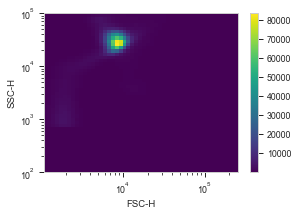

In [9]:
scatter = flow.DensityView(
    xchannel = "FSC-H",
    ychannel = "SSC-H",
    yscale = "log",
    xscale = "log")

scatter.plot(exp, ylim=(100,100000))

Gate FSC-A / SSC-A w/ Guassian w/ 2 sigma stddeviation

In [ ]:
# g = flow.GaussianMixtureOp(name = "Debris_Filter",
#                            channels = ["FSC-H", "SSC-H"],
#                            scale = {'FSC-H' : 'log',
#                                     'SSC-H' : 'log'},
#                            num_components = 3, # three seems to do better than two for some cases, if not, can just pick the two
#                            sigma = 2)

# g.estimate(exp_LB)
# g.estimate(exp_M9)

In [10]:
g2 = flow.PolygonOp(name = "Debris_Filter",
                    xchannel = "FSC-H",
                    ychannel = "SSC-H",
                    xscale = 'log',
                    yscale = 'log')

g2.vertices = [(6000, 15000), # bottom left
             (15000, 15000), # bottom right
             (15000, 55000), # top right
             (6000, 55000)] # top left

In [ ]:
# # takes awhile to run this section
# exp_gated_LB = g.apply(exp_LB)
# exp_gated_M9 = g.apply(exp_M9)

In [11]:
# for polygon gating as opposed to using Gaussian mixture model
exp_gated = g2.apply(exp)
exp2_gated = g2.apply(exp2)

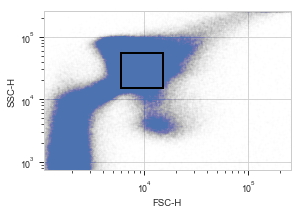

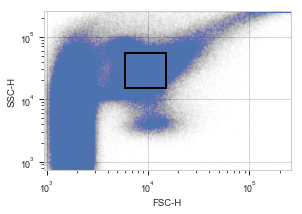

In [12]:
# takes a minute or two to run
g2.default_view().plot(exp_gated, alpha = 0.002)
g2.default_view().plot(exp2_gated, alpha = 0.002)

In [ ]:
# # also takes awhile to run this section
# g.default_view().plot(exp_gated_LB, alpha = 0.02)
# g.default_view().plot(exp_gated_M9, alpha = 0.02)

In [13]:
exp_gated.data.head(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,...,col,iptg,media,nar,parent_strain,replicate,row,sample_num,strain_num,Debris_Filter
0,55.799999,79.0,2857.430176,2403.0,1.480000,47.0,104.029999,59.0,5914.799805,6275.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT206,False
1,78.120003,40.0,2065.060059,2020.0,18.500000,60.0,60.769997,53.0,3219.659912,3352.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT206,False
2,119.970001,95.0,5842.050293,3731.0,16.280001,41.0,11.330000,36.0,12129.990234,12679.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT206,False
3,28.830000,63.0,1354.060059,2579.0,0.000000,43.0,-1.030000,59.0,877.919983,951.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT206,False
4,63.240002,65.0,3718.530029,4956.0,-9.620000,39.0,-37.079998,39.0,9556.679688,9649.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT206,False
5,47.430000,76.0,5537.110352,4432.0,-1.480000,42.0,-13.389999,42.0,14202.959961,14716.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT206,False
6,-6.510000,58.0,3035.180176,2486.0,33.299999,44.0,-19.570000,44.0,6603.930176,7242.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT206,False
7,-13.950000,38.0,2317.070068,2607.0,7.400000,36.0,49.439999,40.0,7629.720215,7771.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT206,False
8,77.190002,70.0,2942.750000,2943.0,24.420000,52.0,33.989998,40.0,10020.750000,10466.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT206,False
9,54.869999,74.0,1360.380005,2182.0,-3.700000,28.0,29.869999,92.0,5517.689941,5850.0,...,1,0.0,M9,0.0,EcN,1,A,1,AJT206,False


In [14]:
# should use Debris_Filter_2 if using Gaussian Mixture Model, otherwise Debris_Filter
exp_gated.data.groupby(['Debris_Filter','parent_strain','strain_num', 'media', 'iptg','ara', 'atc','nar']).size()
exp2_gated.data.groupby(['Debris_Filter','parent_strain','strain_num', 'media', 'ohc14','van','cuma']).size()

Debris_Filter  parent_strain  strain_num  media  ohc14      van        cuma      
False          EcN            AJT278      M9     0.000000   0.00000    0.000000       10159
                                                                       1.953125       17339
                                                                       3.906250       18785
                                                                       7.812500       17777
                                                                       15.625000      18325
                                                                       31.250000      18474
                                                                       62.500000      18355
                                                                       500.000000     16573
                              AJT275      M9     0.000000   0.00000    0.000000       17250
                                                 0.019531   0.00000    0.000000       1600

In [15]:
exp_gated_df = exp_gated.data
exp2_gated_df = exp2_gated.data


filtered  = pd.concat([exp_gated_df[(exp_gated_df['Debris_Filter']==True)&(exp_gated_df['strain_num']!='blank')] , 
                       exp2_gated_df[(exp2_gated_df['Debris_Filter']==True)&(exp2_gated_df['strain_num']!='blank')]])

#picked debris filter that looked best qualitatitvely and excluded blank wells

filtered.tail(10)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Debris_Filter,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,...,iptg,media,nar,ohc14,parent_strain,replicate,row,sample_num,strain_num,van
1905367,True,3305.219971,3275.0,6064.040039,7527.0,26.639999,74.0,-3.090000,62.0,22366.500000,...,NaN,M9,NaN,0.0,EcN,1,H,47,AJT278,0.0
1905368,True,3686.520020,3918.0,8173.340332,9554.0,-7.400000,29.0,184.369995,93.0,27845.130859,...,NaN,M9,NaN,0.0,EcN,1,H,47,AJT278,0.0
1905369,True,3049.469971,3183.0,7181.890137,8515.0,-7.400000,28.0,55.619999,92.0,24300.900391,...,NaN,M9,NaN,0.0,EcN,1,H,47,AJT278,0.0
1905371,True,3620.489990,3727.0,8301.320312,9555.0,-13.320000,44.0,130.809998,69.0,26263.201172,...,NaN,M9,NaN,0.0,EcN,1,H,47,AJT278,0.0
1905372,True,3382.409912,3559.0,7202.430176,8426.0,-14.800000,4.0,33.989998,92.0,28675.621094,...,NaN,M9,NaN,0.0,EcN,1,H,47,AJT278,0.0
1905373,True,6569.520020,6443.0,4867.189941,6407.0,-6.660000,26.0,130.809998,126.0,53092.769531,...,NaN,M9,NaN,0.0,EcN,1,H,47,AJT278,0.0
1905374,True,4503.060059,4771.0,8725.549805,9422.0,-45.880001,16.0,54.590000,48.0,30990.390625,...,NaN,M9,NaN,0.0,EcN,1,H,47,AJT278,0.0
1905375,True,6143.580078,5893.0,4907.479980,6296.0,-39.220001,36.0,-76.220001,84.0,44451.210938,...,NaN,M9,NaN,0.0,EcN,1,H,47,AJT278,0.0
1905376,True,5021.069824,4918.0,7926.070312,9579.0,-11.840000,39.0,-21.629999,71.0,35669.218750,...,NaN,M9,NaN,0.0,EcN,1,H,47,AJT278,0.0
1905377,True,3106.199951,3083.0,7996.380371,8967.0,-2.220000,24.0,-15.450000,69.0,20515.800781,...,NaN,M9,NaN,0.0,EcN,1,H,47,AJT278,0.0


# Start from here

In [16]:
## pickle allows you to save an object as binary so it can be re-opened next time without re-running
## all of the code that loaded it

# pickle.dump(exp_gated_df, open("pickledata_gated.p", "wb")) # wb is for writing binary
exp_gated_df = pickle.load(open("pickledata_gated.p", "rb")) # rb is for reading binary


# pickle.dump(exp2_gated_df, open("pickledata2_gated.p", "wb")) # wb is for writing binary
exp2_gated_df = pickle.load(open("pickledata2_gated.p", "rb")) # rb is for reading binary

# pickle.dump(filtered, open("pickledata_filtered.p", "wb")) # wb is for writing binary
filtered = pickle.load(open("pickledata_filtered.p", "rb")) # rb is for reading binary

## Calculating Medians

In [17]:
parent = sorted(filtered['parent_strain'].unique()) # get strain numbers in experiment
print(parent)

['EcN']


In [18]:
strains = sorted(filtered['strain_num'].unique()) # get strain numbers in experiment
print(strains)

['AJT206', 'AJT269', 'AJT270', 'AJT273', 'AJT274', 'AJT275', 'AJT276', 'AJT278', 'AJT280']


In [19]:
media = sorted(filtered['media'].unique()) # get media used in experiment
print(media)

['M9']


In [52]:
# SPECIFY INDUCERS USED IN THIS EXPERIMENT 
# can't get this from conditions.csv because did them as columns with float values instead of having 
# an inducer name column, which helps deal with situations where multiple inducers are added to same well
inducers = ['iptg','ara','atc','nar','ohc14','van','cuma'] 

starting_conc = {'iptg': [2.5], 'ara': [15.625],
                 'atc': [0.39], 'nar': [0.48],
                'ohc14': [0.009], 'van': [0.78],
                'cuma': [0.975]}

inducer_info = {'iptg': {'color': '#fbb03b', # color same as from Adam's paper
                        'conc': sorted(filtered[~np.isnan(filtered['iptg'])]['iptg'].unique()), # get concentrations for atc
                        'plot_conc': starting_conc['iptg'] + sorted(filtered[~np.isnan(filtered['iptg'])]['iptg'].unique())[1:]}, # make starting concentration not 0

                'ara': {'color': '#016837', # color same as from Adam's paper
                        'conc': sorted(filtered[~np.isnan(filtered['ara'])]['ara'].unique()), # get concentrations for atc
                        'plot_conc': starting_conc['ara'] + sorted(filtered[~np.isnan(filtered['ara'])]['ara'].unique())[1:]},
                
               'atc': {'color': '#00ffff', # color same as from Adam's paper
                        'conc': sorted(filtered[~np.isnan(filtered['atc'])]['atc'].unique()), # get concentrations for atc
                        'plot_conc': starting_conc['atc'] + sorted(filtered[~np.isnan(filtered['atc'])]['atc'].unique())[1:]}, # make starting concentration not 0

                'nar': {'color': '#0071bb', # color same as from Adam's paper
                        'conc': sorted(filtered[~np.isnan(filtered['nar'])]['nar'].unique()), # get concentrations for atc
                        'plot_conc': starting_conc['nar'] + sorted(filtered[~np.isnan(filtered['nar'])]['nar'].unique())[1:]},
                
                'ohc14': {'color': '#00b4ff', # color same as from Adam's paper
                        'conc': sorted(filtered[~np.isnan(filtered['ohc14'])]['ohc14'].unique()), # get concentrations for atc
                        'plot_conc': starting_conc['ohc14'] + sorted(filtered[~np.isnan(filtered['ohc14'])]['ohc14'].unique())[1:]}, # make starting concentration not 0

                'van': {'color': '#ff00ff', # color same as from Adam's paper
                        'conc': sorted(filtered[~np.isnan(filtered['van'])]['van'].unique()), # get concentrations for atc
                        'plot_conc': starting_conc['van'] + sorted(filtered[~np.isnan(filtered['van'])]['van'].unique())[1:]},
                
                'cuma': {'color': '#ff0000', # color same as from Adam's paper
                        'conc': sorted(filtered[~np.isnan(filtered['cuma'])]['cuma'].unique()), # get concentrations for atc
                        'plot_conc': starting_conc['cuma'] + sorted(filtered[~np.isnan(filtered['cuma'])]['cuma'].unique())[1:]}
               
               } # make starting concentration not 0

# print(inducer_info['nar']['plot_conc'])
print(inducer_info)

{'iptg': {'color': '#fbb03b', 'conc': [0.0, 5.0, 15.0, 25.0, 40.0, 70.0, 200.0, 1000.0], 'plot_conc': [2.5, 5.0, 15.0, 25.0, 40.0, 70.0, 200.0, 1000.0]}, 'ara': {'color': '#016837', 'conc': [0.0, 31.25, 125.0, 250.0, 500.0, 1000.0, 2000.0, 4000.0], 'plot_conc': [15.625, 31.25, 125.0, 250.0, 500.0, 1000.0, 2000.0, 4000.0]}, 'atc': {'color': '#00ffff', 'conc': [0.0, 0.78, 1.56, 3.12, 6.25, 12.5, 50.0, 400.0], 'plot_conc': [0.39, 0.78, 1.56, 3.12, 6.25, 12.5, 50.0, 400.0]}, 'nar': {'color': '#0071bb', 'conc': [0.0, 0.9765625, 3.90625, 15.625, 31.25, 62.5, 250.0, 1000.0], 'plot_conc': [0.48, 0.9765625, 3.90625, 15.625, 31.25, 62.5, 250.0, 1000.0]}, 'ohc14': {'color': '#00b4ff', 'conc': [0.0, 0.01953125, 0.0390625, 0.078125, 0.15625, 0.3125, 1.25, 10.0], 'plot_conc': [0.009, 0.01953125, 0.0390625, 0.078125, 0.15625, 0.3125, 1.25, 10.0]}, 'van': {'color': '#ff00ff', 'conc': [0.0, 1.56125, 6.25, 12.5, 25.0, 50.0, 100.0, 200.0], 'plot_conc': [0.78, 1.56125, 6.25, 12.5, 25.0, 50.0, 100.0, 200.0

In [53]:
# inducer_info_8conc_paper = inducer_info
# %store inducer_info_8conc_paper

Stored 'inducer_info_8conc_paper' (dict)


In [72]:
# list(filtered[filtered['parent_strain']=='AJT207']['strain_num'].unique())[0]

'AJT362'

In [28]:
data_dict = dict() # initiate dictionary

# make giant nested dictionary with medians in it for each condition (media, inducer, concentration, strain)
for m in media:
    data_dict[m] = dict()
    for i in inducers:
        data_dict[m][i] = dict()
        for p in parent:
            data_dict[m][i][p] = dict()
        
        # since not all strains were induced with all inducers (e.g. Pvan was never induced with iptg), 
        # making separate strain lists for each inducer; otherwise, there will be an error that the strain 
        # with inducer condition !=0 doesn't exist (that's my guess anyways)

        # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file            
            strains_subset = [s for s in strains if (len(filtered[filtered['strain_num']==s][i].unique())>1 and
                                                     s in filtered[filtered['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later

            for c in inducer_info[i]['conc']:
                data_dict[m][i][p][c] = dict()
                for s in strains_subset:
                    q = filtered.query('media == "{}"'.format(m) 
                                       + ' and ' + '{} == {}'.format(i, c)
#                                        + ' and ' + 'parent_strain == "{}"'.format(p)
                                       + ' and ' +  'strain_num == "{}"'.format(s))
                    data_dict[m][i][p][c][s] = q['FITC-A'].median()

# make dictionary of dataframes beacuse dataframes look nicer
data = dict()

for m in media:
    data[m] = dict()
    for i in inducers:
        data[m][i] = dict()
        for p in parent:
            data[m][i][p] = pd.DataFrame.from_dict(data_dict[m][i][p])
        
# data['M9']['ohc14']

In [9]:
# pickle.dump(data, open("data.p", "wb")) # wb is for writing binary

In [37]:
data['M9']['cuma']['EcN']

,0.0,1.953125,3.90625,7.8125,15.625,31.25,62.5,500.0
AJT278,368.279999,392.459991,426.869995,645.419983,1381.97998,2465.429932,3294.060059,3935.76001


In [38]:
# AJT269_ODnorm_r1_au_store = data['M9']['iptg']['EcN'].loc['AJT269']
# AJT270_ODnorm_r1_au_store = data['M9']['ara']['EcN'].loc['AJT270']
# AJT273_ODnorm_r1_au_store = data['M9']['atc']['EcN'].loc['AJT273']
# AJT274_ODnorm_r1_au_store = data['M9']['nar']['EcN'].loc['AJT274']
# AJT275_ODnorm_r1_au_store = data['M9']['ohc14']['EcN'].loc['AJT275']
# AJT276_ODnorm_r1_au_store = data['M9']['van']['EcN'].loc['AJT276']
# AJT278_ODnorm_r1_au_store = data['M9']['cuma']['EcN'].loc['AJT278']

# %store AJT269_ODnorm_r1_au_store
# %store AJT270_ODnorm_r1_au_store
# %store AJT273_ODnorm_r1_au_store
# %store AJT274_ODnorm_r1_au_store
# %store AJT275_ODnorm_r1_au_store
# %store AJT276_ODnorm_r1_au_store
# %store AJT278_ODnorm_r1_au_store

Stored 'AJT269_ODnorm_r1_au_store' (Series)
Stored 'AJT270_ODnorm_r1_au_store' (Series)
Stored 'AJT273_ODnorm_r1_au_store' (Series)
Stored 'AJT274_ODnorm_r1_au_store' (Series)
Stored 'AJT275_ODnorm_r1_au_store' (Series)
Stored 'AJT276_ODnorm_r1_au_store' (Series)
Stored 'AJT278_ODnorm_r1_au_store' (Series)


In [39]:
# dictionary with strain information that can be copied from experiment to experiment
strain_info = dict([('AJT206', {'color': 'k', 
                                'promoter': 'none',
                                'inducer': 'none'}), 
                      ('AJT280',{'color': 'k', 
                                 'promoter': 'RPU',
                                'inducer': 'none'}),
                      ('AJT269',{'color': '#fbb03b', 
                                 'promoter': '$P_{Tac}$',
                                'inducer': 'iptg'}),
                      ('AJT270',{'color': '#016837', 
                                 'promoter': '$P_{BAD_{mc1}}$',
                                'inducer': 'ara'}),
                      ('AJT271',{'color': '#016837', 
                                 'promoter': '$P_{BAD_{mc}}$',
                                'inducer': 'ara'}),
                      ('AJT272',{'color': '#00ffff', 
                                 'promoter': '$P_{Tet_{D18}}$',
                                'inducer': 'aTc'}),
                      ('AJT273',{'color': '#00ffff', 
                                 'promoter': '$P_{Tet_{Org}}$',
                                'inducer': 'aTc'}),
                      ('AJT274',{'color': '#0071bb', 
                                'promoter': '$P_{Ttg_{v1}}$',
                                 'inducer': 'nar'}),
                      ('AJT275',{'color': '#00b4ff', 
                                'promoter': '$P_{Cin}$',
                                'inducer': 'ohc14'}),
                      ('AJT276',{'color': '#ff00ff', 
                                 'promoter': '$P_{Van_{v2}}$',
                                'inducer': 'van'}),
                      ('AJT277',{'color': '#ff0000', 
                                'promoter': '$P_{CymRC_{v1}}$',
                                'inducer': 'cuma'}),
                      ('AJT278',{'color': '#ff0000', 
                                 'promoter': '$P_{CymRC_{v2}}$',
                                'inducer': 'cuma'}),
                      ('AJT279',{'color': '#ff00ff', 
                                 'promoter': '$P_{Van_{v1}}$',
                                'inducer': 'van'}),
                    
                      ('AJT361',{'color': 'k', 
                                 'promoter': 'none',
                                'inducer': 'none'}),
                      ('AJT374',{'color': 'k',
                                'promoter': 'none',
                                'inducer':'none'}),
                      ('AJT367',{'color': '#fbb03b', 
                                 'promoter': '$P_{Tac}$',
                                'inducer': 'iptg'}),
                      ('AJT368',{'color': '#016837', 
                                 'promoter': '$P_{BAD_{mc1}}$',
                                'inducer': 'ara'}),
                      ('AJT369',{'color': '#00ffff', 
                                 'promoter': '$P_{Tet_{Org}}$',
                                'inducer': 'aTc'}),
                      ('AJT370',{'color': '#0071bb', 
                                'promoter': '$P_{Ttg_{v1}}$',
                                 'inducer': 'nar'}),
                      ('AJT371',{'color': '#00b4ff', 
                                'promoter': '$P_{Cin}$',
                                'inducer': 'ohc14'}),
                      ('AJT372',{'color': '#ff00ff', 
                                 'promoter': '$P_{Van_{v2}}$',
                                'inducer': 'van'}),
                      ('AJT373',{'color': '#ff0000', 
                                 'promoter': '$P_{CymRC_{v2}}$',
                                'inducer': 'cuma'}),

                    
                      ('AJT362',{'color': 'k', 
                                 'promoter': 'none',
                                'inducer': 'none'}),
                      ('AJT382',{'color': 'k',
                                'promoter': 'none',
                                'inducer':'none'}),
                      ('AJT375',{'color': '#fbb03b', 
                                 'promoter': '$P_{Tac}$',
                                'inducer': 'iptg'}),
                      ('AJT376',{'color': '#016837', 
                                 'promoter': '$P_{BAD_{mc1}}$',
                                'inducer': 'ara'}),
                      ('AJT377',{'color': '#00ffff', 
                                 'promoter': '$P_{Tet_{Org}}$',
                                'inducer': 'aTc'}),
                      ('AJT378',{'color': '#0071bb', 
                                'promoter': '$P_{Ttg_{v1}}$',
                                 'inducer': 'nar'}),
                      ('AJT379',{'color': '#00b4ff', 
                                'promoter': '$P_{Cin}$',
                                'inducer': 'ohc14'}),
                      ('AJT380',{'color': '#ff00ff', 
                                 'promoter': '$P_{Van_{v2}}$',
                                'inducer': 'van'}),
                      ('AJT381',{'color': '#ff0000', 
                                 'promoter': '$P_{CymRC_{v2}}$',
                                'inducer': 'cuma'}),                    
                   ])

# print(strain_info['AJT275']['promoter'])

# promoters =[]
# for s in strains : # excludes AJT206 and AJT280; could do this a better way than by using these indexes
#     promoters.append(strain_info[s]['promoter'])
    
# print(promoters)

In [11]:
# dictionary with strain information that can be copied from experiment to experiment

# PsrA = '#d33dc1'
# HlyIIR = '#d2aa85'
# B3BM3R1 = '#44a8c3'
# AmtR = '#32a87c'
# QacR = '#c83832'
# LitR = '#f79a7a'
# AmeR = '#fd4131'
# IcaR = '#6a86c5'
# BetI = '#960985'
# PhlF = '#7bc229'

strain_info_rep = dict([
    ('AJT206', {'color': 'k',
                'repressor': 'none'}),
    ('AJT280',{'color': 'k',
               'repressor': 'RPU'}),
    ('AJT303',{'color': '#d33dc1',
               'repressor': 'PsrA'}),
    ('AJT304',{'color': '#d2aa85',
               'repressor': 'HlyIIR'}),
    ('AJT305',{'color': '#44a8c3',
               'repressor': 'B3BM3R1'}),
    ('AJT306',{'color': '#32a87c',
               'repressor': 'AmtR'}),
    ('AJT307',{'color': '#c83832',
               'repressor': 'QacR'}),
    ('AJT308',{'color': '#f79a7a',
               'repressor': 'LitR'}),
    ('AJT309',{'color': '#fd4131',
               'repressor': 'AmeR'}),
    ('AJT310',{'color': '#6a86c5',
               'repressor': 'IcaR'}),
    ('AJT311',{'color': '#960985',
               'repressor': 'BetI'}),
    ('AJT312',{'color': '#7bc229',
               'repressor': 'PhlF'}),
    ('AJT344', {'color': '#6a86c5',
               'repressor': 'IcaR'}),
    ('AJT269',{'color': '#fbb03b',
               'repressor': '$P_{Tac}$'})
])

In [41]:
fig_pos = dict()

for m in media:
    fig_pos[m] = dict()
    strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']
    for s in strains_subset:
        fig_pos[m][s] = {'fig_row': strains_subset.index(s)//3, 'fig_col': strains_subset.index(s)-(3*(strains_subset.index(s)//3))}

fig_pos

{'M9': {'AJT269': {'fig_row': 0, 'fig_col': 0},
  'AJT270': {'fig_row': 0, 'fig_col': 1},
  'AJT273': {'fig_row': 0, 'fig_col': 2},
  'AJT274': {'fig_row': 1, 'fig_col': 0},
  'AJT275': {'fig_row': 1, 'fig_col': 1},
  'AJT276': {'fig_row': 1, 'fig_col': 2},
  'AJT278': {'fig_row': 2, 'fig_col': 0}}}

## Plot transfer function (no autofluorescence subtracted)

In [42]:
# Jai's fancy script that contains a class that builds transfer functions
## path for it in terminal open -a Sublime\ Text transferfunction.py

%load_ext autoreload
# %autoreload # to make sure that it reloads properly when this is run
from transferfunction import *

/usr/local/lib/python3.6/site-packages/transferfunction.py:60: RuntimeWarning: invalid value encountered in double_scalars


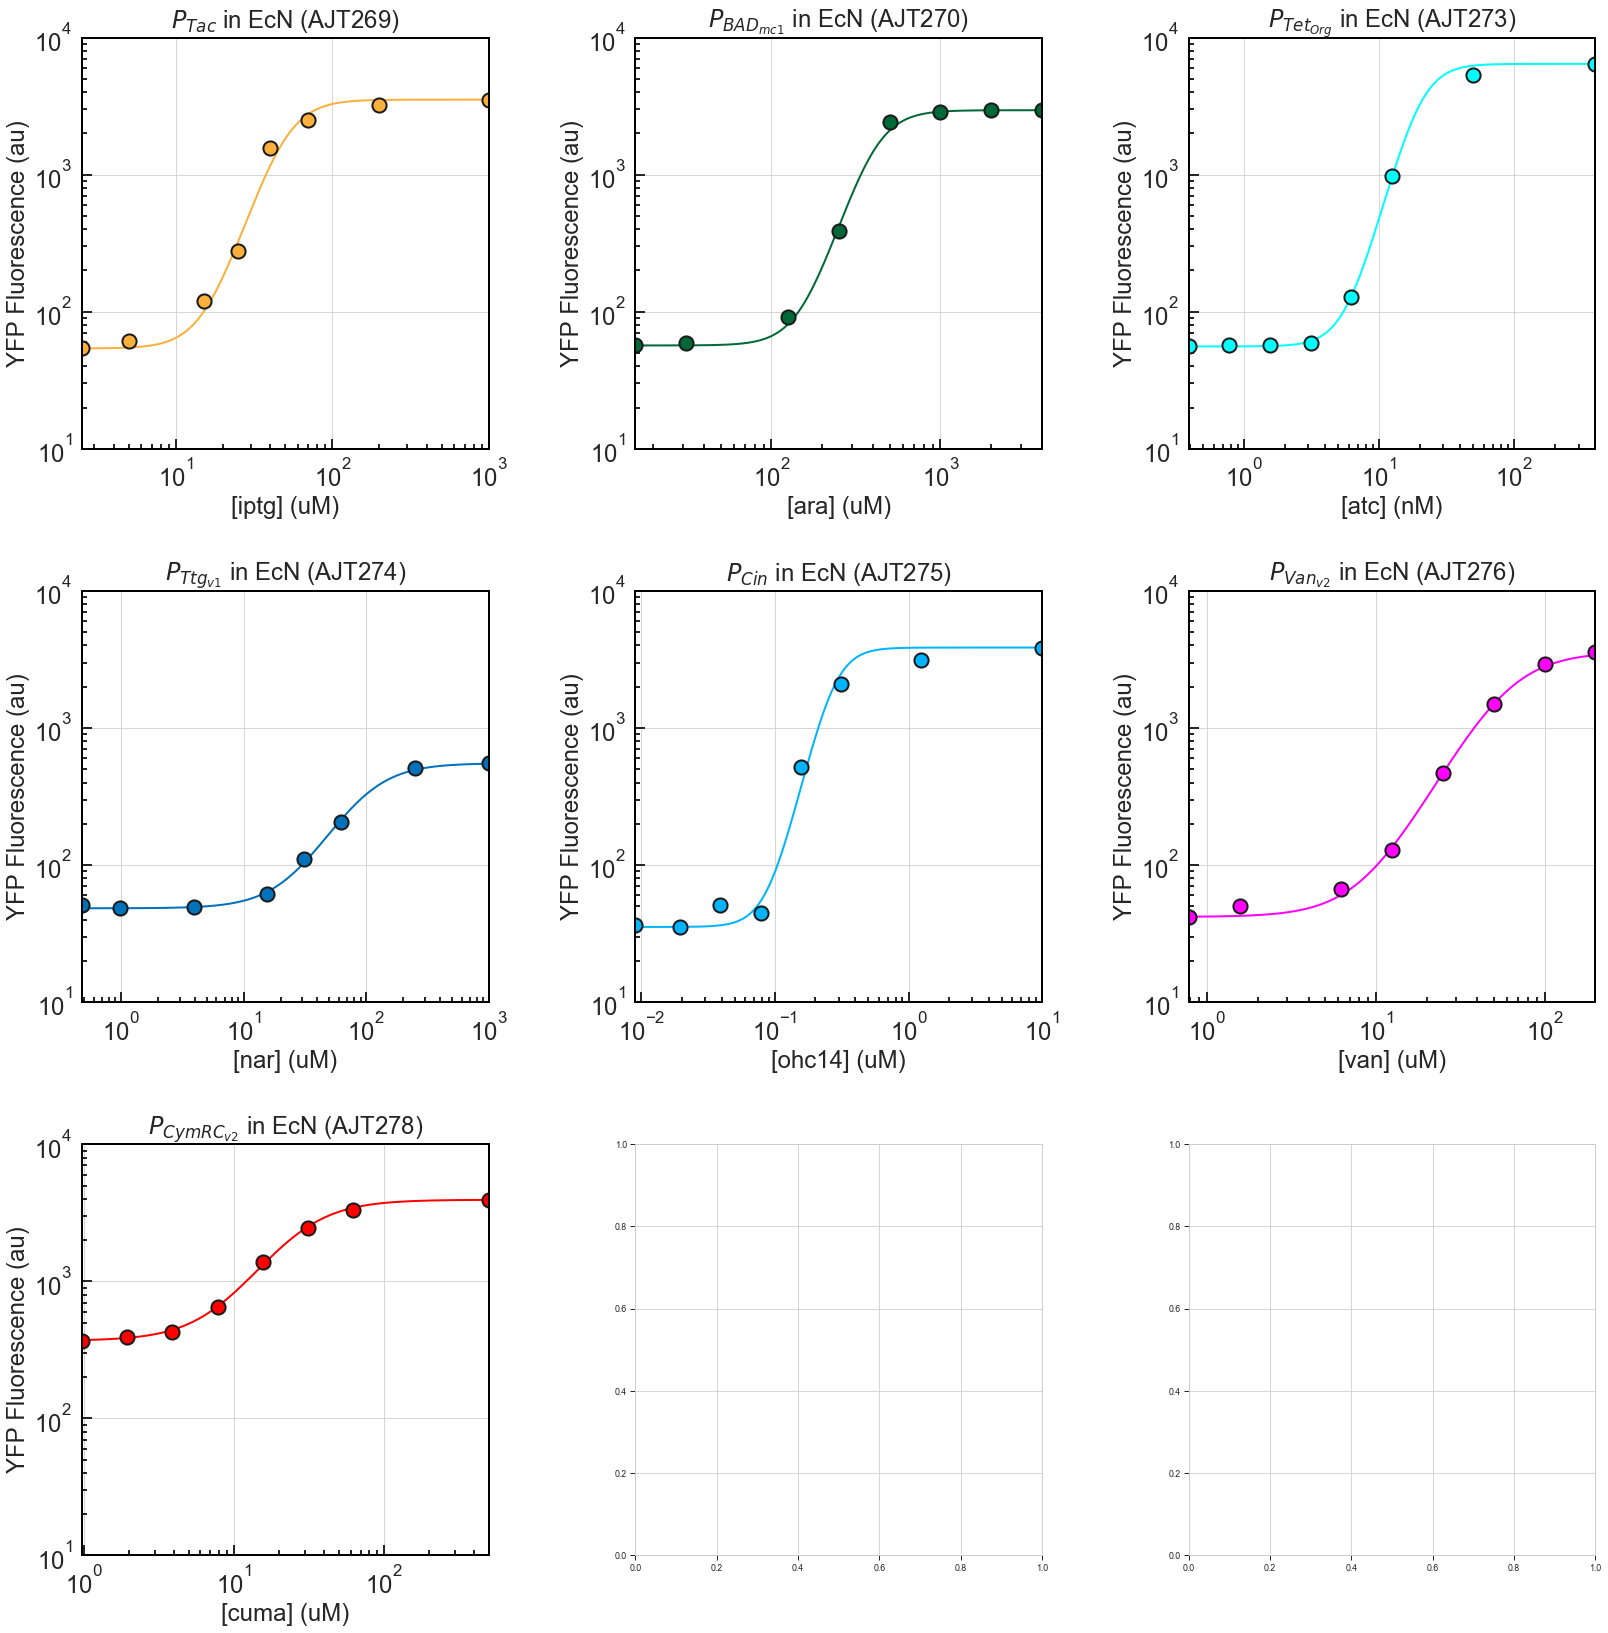

In [54]:
## plot transfer function (no autofluorescence subtracted)

rows = 3
cols = 3

fig, ax = plt.subplots(rows,cols, figsize=(cols*7.5,rows*7.5)) # row, column format
plt.tight_layout(pad = 4, h_pad = 12, w_pad = 12) #tidies up spacing between plots

# ## make borders black (https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib)
# for spine in ax.spines.values():
#     spine.set_edgecolor('k')

tfs = dict() # dictionary that eventually contains transfer function information

for m in media:
    tfs[m] = dict()
    
    for i in inducers:
        tfs[m][i] = dict()
        for p in parent:
            tfs[m][i][p] = dict()
            # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file
            strains_subset = [s for s in strains if (len(filtered[filtered['strain_num']==s][i].unique())>1 and
                                                     s in filtered[filtered['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later

            for s in strains_subset:
                if s != 'AJT206' and s != 'AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382': # exclude these because I don't need them
                    
                    FP = ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']]
                    
                    ## make borders black (https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib)
                    for spine in FP.spines.values():
                        spine.set_edgecolor('black')
                        spine.set_linewidth(2)
                        
                    tfs[m][i][p][s] = build_transfer_functions([inducer_info[i]['plot_conc']], # x data
                                                      [data[m][i][p].loc[s].tolist()], # y data; needs to be a list for Jai's stuff
                                                      ['{} in {} ({})'.format(strain_info[s]['promoter'], list(filtered[filtered['strain_num']==s]['parent_strain'].unique())[0], s)]) # name of transfer function                
                    ## scatter
                    # have to get data from tfs[m][i] as [0] because it is a list of lists, which in this case is only 1 list
                    # .inputs and .outputs notation is from Jai's script, which creates objects from what was fed to tf builder
                    FP.scatter(tfs[m][i][p][s][0].inputs, tfs[m][i][p][s][0].outputs,
                                                                s = 200, zorder=2, c = strain_info[s]['color'],
                                                                edgecolors = 'k', linewidths = 2)

                    ## fitting line
                    xvals = np.logspace(np.log10(inducer_info[i]['plot_conc'][0]),np.log10(inducer_info[i]['plot_conc'][-1]), 1000) # x values for creating smooth line

                    # tfs[m][i][0].hill_eqn(xvals) outputs y values for hill equation at many x values; 
                    # uses fit parameters from build_transfer_functions module above
                    FP.plot(xvals, tfs[m][i][p][s][0].hill_eqn(xvals), 
                                                                                   color = strain_info[s]['color'],
                                                                                   zorder = 1, linewidth = 2)

                    FP.set_yscale('log')
                    FP.set_xscale('log')
                    FP.set_ylabel('YFP Fluorescence (au)', size = 24)
                    FP.set_xlabel('[{}] (uM)'.format(i), size = 24)
                    
                    if i == 'atc':
                        FP.set_xlabel('[{}] (nM)'.format(i), size = 24)
                    
                    FP.set_title(tfs[m][i][p][s][0].name, size = 24, pad = 10)

#                     # scatter
#                     ax[fig_pos[m][s]['fig_col']].scatter(inducer_info[i]['plot_conc'], 
#                                     data[m][i][p].loc[s], s = 200, zorder=2, c = strain_info[s]['color'], 
#                                     edgecolors = 'k', linewidths = 2)

#                     ax[fig_pos[m][s]['fig_col']].set_yscale('log')
#                     ax[fig_pos[m][s]['fig_col']].set_xscale('log')
#                     ax[fig_pos[m][s]['fig_col']].set_ylabel('YFP Fluorescence (au)', size = 24)
#                     ax[fig_pos[m][s]['fig_col']].set_xlabel('[{}] (uM)'.format(i), size = 24)
#                     ax[fig_pos[m][s]['fig_col']].set_title('{} in {} ({})'.format(strain_info[s]['promoter'],
#                                                                                   list(filtered[filtered['strain_num']==s]['parent_strain'].unique())[0], s), 
#                                                                                    size = 24)
                    FP.tick_params(labelsize = 24, length = 10, width = 2, direction = 'in', pad = 10)
                    FP.tick_params(which='minor', length = 5, width = 2, direction = 'in')
                    FP.set_ylim(10,10000)
                    FP.set_xlim(inducer_info[i]['plot_conc'][0],inducer_info[i]['plot_conc'][-1])

                    FP.yaxis.grid(True)
                    FP.xaxis.grid(True)
                    
        #             ax[fig_pos[m][i]['fig_row']][fig_pos[m][i]['fig_col']].set_xticks(range(len(promoters)+1))
    #                 ax[fig_pos[m][i]['fig_row']][fig_pos[m][i]['fig_col']].set_xticklabels(inducer_info[i]['conc'])

In [55]:
# fig.savefig('TF_au.pdf', bbox_inches = "tight", transparent = True)


6
1.791759469228055
0.7781512503836436


## Plot histogram-style transfer function (no autofluorescence subtracted)

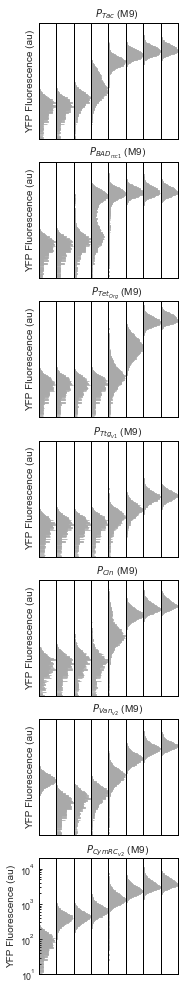

In [51]:
## Histogram-style transfer functions like in Cello SI

data_his_dict = dict() # initiate dictionary


fig_his, ax_his = plt.subplots(len(inducers),len(inducer_info[i]['conc']), figsize=(2.5,len(inducers)*2.5)) # row, column format
plt.subplots_adjust(wspace=0) #get rid of horizontal spacing between plots

for m in media:
    data_his_dict[m] = dict()
    for i in inducers:  
        data_his_dict[m][i] = dict()
        for p in parent:
            data_his_dict[m][i][p] = dict()
        
        # since not all strains were induced with all inducers (e.g. Pvan was never induced with iptg), 
        # making separate strain lists for each inducer; otherwise, there will be an error that the strain 
        # with inducer condition !=0 doesn't exist (that's my guess anyways)

        # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file
            strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']
            strains_subset = [s for s in strains_subset if len(filtered[filtered['strain_num']==s][i].unique())>1]

            for c in inducer_info[i]['conc']:
                data_his_dict[m][i][p][c] = dict()
                
                FP = ax_his[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][inducer_info[i]['conc'].index(c)]
                
                for s in strains_subset:
                    for spine in FP.spines.values():
                        spine.set_edgecolor('black')
                        spine.set_linewidth(1)

                    q = filtered.query('media == "{}"'.format(m) 
                                       + ' and ' + '{} == {}'.format(i, c) 
                                       + ' and ' +  'strain_num == "{}"'.format(s))
                    data_his_dict[m][i][p][c][s] = q['FITC-A']

    #                 print(strains_subset.index(s), inducer_info[i]['conc'].index(c))
                    logbins = np.geomspace(10,20000,200)
                    FP.hist(q['FITC-A'], 
                               bins = logbins, 
                               orientation='horizontal',
                               color = 'darkgray',
                               edgecolor = 'darkgray',
                               zorder=-1)
                    FP.set_yscale('log')
                    FP.set_ylim(10,20000)
                    FP.tick_params(axis='both',which='both', 
                                       bottom=False,top=False,
                                       labelbottom=False,
                                       right=False,left=False,
                                       labelleft=False)
                    FP.grid(False)
                    ax_his[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][0].set_ylabel('YFP Fluorescence (au)', size=10)
                    # only setting title on middle subplot, needs to be floor division operator to avoid it being a float
                    ax_his[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][(len(inducer_info[i]['conc'])//2)].set_title('{} ({})'.format(strain_info[s]['promoter'], m), size = 10)
                    ax_his[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][0].tick_params(axis='y',which='major',left=True, 
                                                                   length=3, width=1, labelleft=True, direction='in')
                    ax_his[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][0].tick_params(axis='y',which='minor', left=True,
                                                                   length=1.5, width=1, direction='in')     
                
# make dictionary of dataframes beacuse dataframes look nicer
data_his = dict()

for m in media:
    data_his[m] = dict()
    for i in inducers:
        data_his[m][i] = dict()
        for p in parent:
            data_his[m][i][p] = pd.DataFrame.from_dict(data_his_dict[m][i][p])

                
                

## Subtract autofluorescence

In [11]:
# make dictionary of dataframes beacuse dataframes look nicer
data_autosub = dict()
autofluor = dict()

for m in media:
    data_autosub[m] = dict()
    autofluor[m] = dict()
    for i in inducers:
        data_autosub[m][i] = dict()
        autofluor[m][i] = dict()
        for p in parent:
            if p == 'AJT207':
                autofluor[m][i][p] = data[m][i][p].loc['AJT362', :]
            elif p == 'AJT209':
                autofluor[m][i][p] = data[m][i][p].loc['AJT361', :]
            elif p == 'EcN':
                autofluor[m][i][p] = data[m][i][p].loc['AJT206', :]
            data_autosub[m][i][p] = data[m][i][p].subtract(autofluor[m][i][p], axis = 1)
            data_autosub[m][i][p] = data_autosub[m][i][p].mask(data_autosub[m][i][p] <= 0, 0.1)


data_autosub['M9']['ara']['EcN']

,0.0,31.25,125.0,250.0,500.0,1000.0,2000.0,4000.0
AJT206,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
AJT270,19.529999,17.669998,26.039997,42.780003,43.710003,185.999996,2252.925030,2758.380039
AJT280,1047.180058,1077.870037,1075.080013,1060.200008,1052.759960,1026.720043,983.009991,965.340000


In [51]:
data['M9']['iptg']['EcN']

,0.0,5.0,25.0,40.0,50.0,70.0,200.0,1000.0
AJT206,39.060001,44.639999,39.060001,36.270000,35.340000,34.410000,33.480000,31.620001
AJT269,55.799999,60.450001,823.049988,1801.410034,2041.349976,2221.770020,2996.459961,3431.699951
AJT280,1082.520020,1115.070068,1117.859985,1088.099976,1083.449951,1063.920044,1043.459961,1039.739990


## Plot in RPU (autofluorescence subtracted)

In [19]:
## Put things in RPU
data_RPU = dict()

for m in media:
    data_RPU[m] = dict()
    for i in inducers:
        data_RPU[m][i] = dict()
        for p in parent:
            if p == 'AJT207':
                data_RPU[m][i][p] = data_autosub[m][i][p].div(data_autosub[m][i][p].loc["AJT382",:], axis = 1)
            elif p == 'AJT209':
                data_RPU[m][i][p] = data_autosub[m][i][p].div(data_autosub[m][i][p].loc["AJT374",:], axis = 1)
            elif p == 'EcN':
                data_RPU[m][i][p] = data_autosub[m][i][p].div(data_autosub[m][i][p].loc["AJT280",:], axis = 1)
data_RPU['M9']['iptg']['EcN']

,0.0,5.0,25.0,40.0,50.0,70.0,200.0,1000.0
AJT206,0.000096,0.000093,0.000093,0.000095,0.000095,0.000097,0.000099,0.000099
AJT269,0.016043,0.014770,0.726724,1.678161,1.913931,2.124661,2.933702,3.372694
AJT280,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
data_RPU['M9']['ara']['EcN']

,0.0,31.25,125.0,250.0,500.0,1000.0,2000.0,4000.0
AJT206,0.000095,0.000093,0.000093,0.000094,0.000095,0.000097,0.000102,0.000104
AJT270,0.018650,0.016393,0.024221,0.040351,0.041519,0.181159,2.291864,2.857418
AJT280,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# AJT269_r1_RPU_store = data_RPU['M9']['iptg']['EcN'].loc['AJT269']
# AJT270_r1_RPU_store = data_RPU['M9']['ara']['EcN'].loc['AJT270']

# %store AJT269_r1_RPU_store
# %store AJT270_r1_RPU_store

Stored 'AJT269_r1_RPU_store' (Series)
Stored 'AJT270_r1_RPU_store' (Series)


## Histogram-style transfer function (RPU)

In [22]:
## Subtract autofluorescence from histogram data and put in RPU

# make dictionary of dataframes beacuse dataframes look nicer
data_his_autosub = dict()
data_his_RPU = dict()
autofluor_his = dict()

for m in media:
    data_his_autosub[m] = dict()
    data_his_RPU[m] = dict()
    autofluor_his[m] = dict()
    for i in inducers:
        data_his_autosub[m][i] = dict()
        data_his_RPU[m][i] = dict()
        autofluor_his[m][i] = dict()
        for p in parent:
            if p == 'AJT207':
                autofluor_his[m][i][p] = data[m][i][p].loc["AJT362", :]
            elif p == 'AJT209':
                autofluor_his[m][i][p] = data[m][i][p].loc["AJT361", :]
            elif p == 'EcN':
                autofluor_his[m][i][p] = data[m][i][p].loc["AJT206", :]
            data_his_autosub[m][i][p] = data_his[m][i][p].subtract(autofluor_his[m][i][p], axis = 1)
            strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']
            strains_subset = [s for s in strains_subset if len(filtered[filtered['strain_num']==s][i].unique())>1]
            for c in inducer_info[i]['conc']:
                for s in strains_subset:
                    data_his_autosub[m][i][p][c][s].loc[data_his_autosub[m][i][p][c][s].loc[:]<=0] = 0.1
    #                 print(data_autosub[m][i].loc["AJT280",c])
            if p == 'AJT207':
                data_his_RPU[m][i][p] = data_his_autosub[m][i][p].divide(data_autosub[m][i][p].loc["AJT382",c])
            elif p == 'AJT209':
                data_his_RPU[m][i][p] = data_his_autosub[m][i][p].divide(data_autosub[m][i][p].loc["AJT374",c])
            elif p == 'EcN':
                data_his_RPU[m][i][p] = data_his_autosub[m][i][p].divide(data_autosub[m][i][p].loc["AJT280",c])

# data_his_autosub['M9']['iptg']

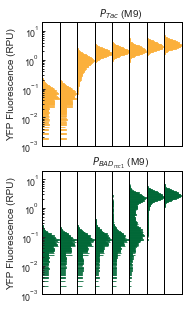

In [57]:
fig_hisRPU, ax_hisRPU = plt.subplots(2,len(inducer_info[i]['conc']), figsize=(2.5,5)) # row, column format
plt.subplots_adjust(wspace=0) #get rid of horizontal spacing between plots

for m in media:
    for i in inducers:  
        for p in parent:

            # since not all strains were induced with all inducers (e.g. Pvan was never induced with iptg), 
            # making separate strain lists for each inducer; otherwise, there will be an error that the strain 
            # with inducer condition !=0 doesn't exist (that's my guess anyways)

            # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file
            strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']
            strains_subset = [s for s in strains_subset if len(filtered[filtered['strain_num']==s][i].unique())>1]
            
            for c in inducer_info[i]['conc']:
                for s in strains_subset:
                    for spine in ax_hisRPU[fig_pos[m][s]['fig_col']][inducer_info[i]['conc'].index(c)].spines.values():
                        spine.set_edgecolor('black')
                        spine.set_linewidth(1)

                    logbins = np.geomspace(.001,20,200)
                    ax_hisRPU[fig_pos[m][s]['fig_col']][inducer_info[i]['conc'].index(c)].hist(data_his_RPU[m][i][p][c][s], 
                                                                                           bins = logbins, 
                                                                                           orientation='horizontal',
                                                                                           color = strain_info[s]['color'],
                                                                                           edgecolor = strain_info[s]['color'],
                                                                                           zorder=-1)
                    ax_hisRPU[fig_pos[m][s]['fig_col']][inducer_info[i]['conc'].index(c)].set_yscale('log')
                    ax_hisRPU[fig_pos[m][s]['fig_col']][inducer_info[i]['conc'].index(c)].set_ylim(.001,20)
                    ax_hisRPU[fig_pos[m][s]['fig_col']][inducer_info[i]['conc'].index(c)].tick_params(axis='both',which='both', 
                                                                                       bottom=False,top=False,
                                                                                       labelbottom=False,
                                                                                       right=False,left=False,
                                                                                       labelleft=False)
                    ax_hisRPU[fig_pos[m][s]['fig_col']][inducer_info[i]['conc'].index(c)].grid(False)
                    ax_hisRPU[fig_pos[m][s]['fig_col']][0].set_ylabel('YFP Fluorescence (RPU)', size=10)
                    ax_hisRPU[fig_pos[m][s]['fig_col']][(len(inducer_info[i]['conc'])//2)].set_title('{} ({})'.format(strain_info[s]['promoter'], m), size = 10)
                    ax_hisRPU[fig_pos[m][s]['fig_col']][0].tick_params(axis='y',which='major',left=True, 
                                                                   length=3, width=1, labelleft=True, direction='in')
                    ax_hisRPU[fig_pos[m][s]['fig_col']][0].tick_params(axis='y',which='minor', left=True,
                                                                   length=1.5, width=1, direction='in') 

In [39]:
# fig_hisRPU.savefig('/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/2020-08-11_EcN_SymbioflorG4_Pcym-v1and2_AJT277_AJT288_AJT373_TFs_M9_300minInduction/TransferFunctions_Histograms.pdf', bbox_inches = "tight", transparent = True)


### Arrange plots better using GridSpec

In [58]:
# deleted this section because didn't need it since I only had one plot, but keeping section title so I remember I have it in older files
import matplotlib.gridspec as gridspec

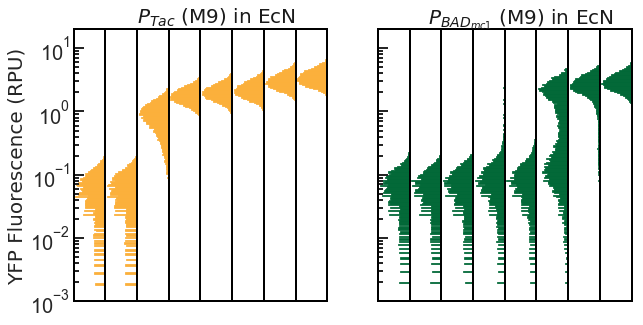

In [70]:
# fig_test = plt.figure(figsize = (15,10))
fig_test = plt.figure(figsize = (10,5))
# main_grid = gridspec.GridSpec(2,3) # two rows, three columns
main_grid = gridspec.GridSpec(1,2) # one row, two columns

# remove width space from between plots so they are scrunched together like Alec's plot
grid1 = main_grid[0].subgridspec(1,8, wspace=0)
grid2 = main_grid[1].subgridspec(1,8, wspace=0)
# grid3 = main_grid[2].subgridspec(1,12, wspace=0)
# grid4 = main_grid[3].subgridspec(1,12, wspace=0)
# grid5 = main_grid[4].subgridspec(1,12, wspace=0)
# grid6 = main_grid[5].subgridspec(1,12, wspace=0)

# so grids can be iterated through because main_grid can't for some reason
# grids = [grid1, grid2, grid3, grid4, grid5, grid6]
grids = [grid1, grid2]

# list of axes to be created (4 empty lists containing 12 empty lists)
# axes = [[[] for i in range(12)] for j in range(6)]
axes = [[[] for i in range(8)] for j in range(len(grids))]

for m in media:
    for i in inducers:  
        for p in parent:
        
            strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']
            strains_subset = [s for s in strains_subset if len(filtered[filtered['strain_num']==s][i].unique())>1]
            
            for c in inducer_info[i]['conc']:
                for s in strains_subset:
                    # add subplot to figure and assign to axes list of lists
                    axes[inducers.index(i)][inducer_info[i]['conc'].index(c)] = fig_test.add_subplot(grids[inducers.index(i)][inducer_info[i]['conc'].index(c)])

                    ## make borders black (https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib)
                    for spine in axes[inducers.index(i)][inducer_info[i]['conc'].index(c)].spines.values():
                        spine.set_edgecolor('black')
                        spine.set_linewidth(2)

                    # make bin boundaries in log space (min, max, # of bins)
                    logbins = np.geomspace(.001,20,200)
                    axes[inducers.index(i)][inducer_info[i]['conc'].index(c)].hist(data_his_RPU[m][i][p][c][s], 
                                                                                           bins = logbins, 
                                                                                           orientation='horizontal',
                                                                                           color = strain_info[s]['color'],
                                                                                           edgecolor = strain_info[s]['color'],
                                                                                           zorder=-1)
                    # to get bottom of axis on right side (to match Alec's plots)
                    axes[inducers.index(i)][inducer_info[i]['conc'].index(c)].invert_xaxis()

                    axes[inducers.index(i)][inducer_info[i]['conc'].index(c)].set_yscale('log')
                    axes[inducers.index(i)][inducer_info[i]['conc'].index(c)].set_ylim(.001,20)

                    # remove tick marks and labels from all plots (add them back to desired plots below)
                    axes[inducers.index(i)][inducer_info[i]['conc'].index(c)].tick_params(axis='both',which='both', 
                                                                                       bottom=False,top=False,
                                                                                       labelbottom=False,
                                                                                       right=False,left=False,
                                                                                       labelleft=False)
                    axes[inducers.index(i)][inducer_info[i]['conc'].index(c)].grid(False)

                    # need this statement because axes[x][6] = [] when loop starts; can't set_title of non-axis
                    # adds title to each "subplot"
                    if axes[inducers.index(i)][(len(inducer_info[i]['conc'])//2)] != []:
                        #to add parent strain, needed to access this way because for loop would just fill value with whatever p's current value is instead of the one that corresponds to the strain number 
                        axes[inducers.index(i)][(len(inducer_info[i]['conc'])//2)].set_title('{} ({}) in {}'.format(strain_info[s]['promoter'], m, list(filtered[filtered['strain_num']==s]['parent_strain'].unique())[0]), 
                                                                   size = 20, color = 'k', fontname = 'Avenir')

                    # add tick marks, but not labels, to all plots
                    axes[inducers.index(i)][0].tick_params(axis='y',which='major',left=True, 
                                                                   length=10, width=2, labelleft=False, direction='in')
                    axes[inducers.index(i)][0].tick_params(axis='y',which='minor', left=True,
                                                                   length=5, width=2, direction='in')

                    # change font to Avenir for tick labels
                    for tick in axes[inducers.index(i)][inducer_info[i]['conc'].index(c)].get_yticklabels():
                        tick.set_fontname("Avenir")                

                    # Add y_label and tick labels to two plots on left
                    axes[0][0].set_ylabel('YFP Fluorescence (RPU)', size=20, fontname = 'Avenir')
                    axes[0][0].tick_params(labelleft=True, labelsize = 20)                
    #                 if axes[1][0] !=[]: 
    #                     axes[1][0].set_ylabel('YFP Fluorescence (RPU)', size=20, fontname = 'Avenir')
    #                     axes[1][0].tick_params(labelleft=True, labelsize = 20)

        

In [42]:
# fig_test.savefig('/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/2020-08-11_EcN_SymbioflorG4_Pcym-v1and2_AJT277_AJT288_AJT373_TFs_M9_300minInduction/TransferFunctions_Histograms.pdf', bbox_inches = "tight", transparent = True)


## RPU Transfer Functions (with curve fit)

In [42]:
# Jai's fancy script that contains a class that builds transfer functions
## path for it in terminal open -a Sublime\ Text transferfunction.py

%load_ext autoreload
# %autoreload # to make sure that it reloads properly when this is run
from transferfunction import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


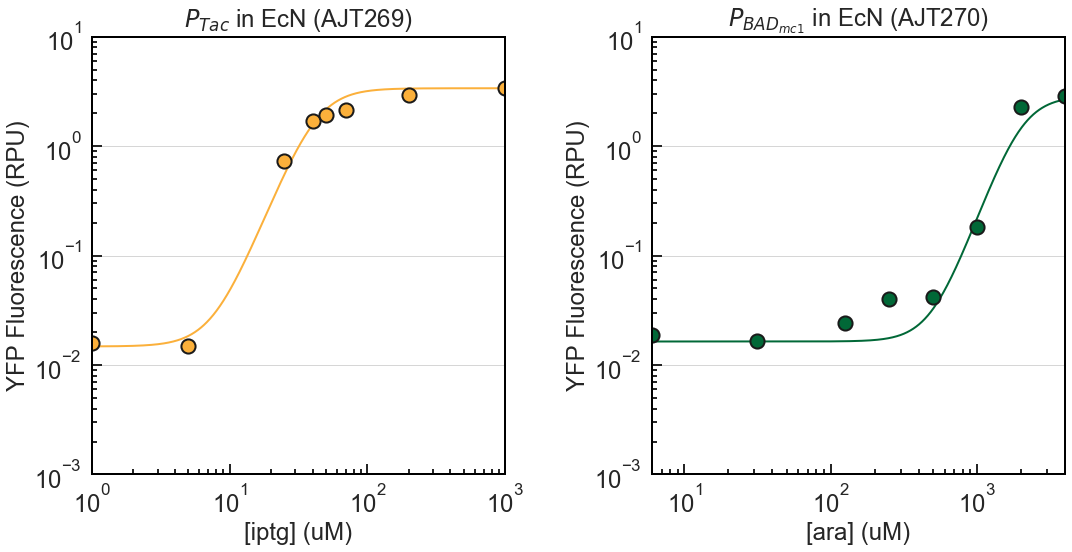

In [72]:
## This one is me making Jai's strategy work with how I already have my data


figRPU, axRPU = plt.subplots(1,2, figsize=(15,7.5)) # row, column format
plt.tight_layout(pad = 4, h_pad = 10, w_pad = 12) #tidies up spacing between plots

tfs_RPU = dict() # dictionary that eventually contains transfer function information

for m in media:
    tfs_RPU[m] = dict()
    
    for i in inducers:
        tfs_RPU[m][i] = dict()
        for p in parent:
            tfs_RPU[m][i][p] = dict()
            # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file
            strains_subset = [s for s in strains if (len(filtered[filtered['strain_num']==s][i].unique())>1 and
                                                     s in filtered[filtered['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later

            for s in strains_subset:
                if s != 'AJT206' and s != 'AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382': # exclude these because I don't need them
#                 strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']                    ## make borders black (https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib)
                    for spine in axRPU[fig_pos[m][s]['fig_col']].spines.values():
                        spine.set_edgecolor('black')
                        spine.set_linewidth(2)

                    tfs_RPU[m][i][p][s] = build_transfer_functions([inducer_info[i]['plot_conc']], # x data
                                                      [data_RPU[m][i][p].loc[s].tolist()], # y data; needs to be a list for Jai's stuff
                                                      ['{} in {} ({})'.format(strain_info[s]['promoter'], list(filtered[filtered['strain_num']==s]['parent_strain'].unique())[0], s)]) # name of transfer function                
                    ## scatter
                    # have to get data from tfs[m][i] as [0] because it is a list of lists, which in this case is only 1 list
                    # .inputs and .outputs notation is from Jai's script, which creates objects from what was fed to tf builder
                    axRPU[fig_pos[m][s]['fig_col']].scatter(tfs_RPU[m][i][p][s][0].inputs, tfs_RPU[m][i][p][s][0].outputs,
                                                                            s = 200, zorder=2, c = strain_info[s]['color'],
                                                                            edgecolors = 'k', linewidths = 2)

                    ## fitting line
                    xvals = np.logspace(np.log10(inducer_info[i]['plot_conc'][0]),np.log10(inducer_info[i]['plot_conc'][-1]), 1000) # x values for creating smooth line

                    # tfs[m][i][0].hill_eqn(xvals) outputs y values for hill equation at many x values; 
                    # uses fit parameters from build_transfer_functions module above
                    axRPU[fig_pos[m][s]['fig_col']].plot(xvals, tfs_RPU[m][i][p][s][0].hill_eqn(xvals), 
                                                                                   color = strain_info[s]['color'],
                                                                                   zorder = 1, linewidth = 2)

                    axRPU[fig_pos[m][s]['fig_col']].set_yscale('log')
                    axRPU[fig_pos[m][s]['fig_col']].set_xscale('log')
                    axRPU[fig_pos[m][s]['fig_col']].set_ylabel('YFP Fluorescence (RPU)', size = 24)
                    axRPU[fig_pos[m][s]['fig_col']].set_xlabel('[{}] (uM)'.format(i), size = 24)
                    axRPU[fig_pos[m][s]['fig_col']].set_title(tfs_RPU[m][i][p][s][0].name, size = 24, pad = 10)
                    axRPU[fig_pos[m][s]['fig_col']].tick_params(labelsize = 24, length = 10, width = 2, direction = 'in', pad = 10)
                    axRPU[fig_pos[m][s]['fig_col']].tick_params(which='minor', length = 5, width = 2, direction = 'in')
                    axRPU[fig_pos[m][s]['fig_col']].set_xlim(inducer_info[i]['plot_conc'][0],inducer_info[i]['plot_conc'][-1])
                    axRPU[fig_pos[m][s]['fig_col']].set_ylim(0.001,10)
                    axRPU[fig_pos[m][s]['fig_col']].yaxis.grid(True)
                    axRPU[fig_pos[m][s]['fig_col']].xaxis.grid(False)

In [73]:
# figRPU.savefig('/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/2020-08-20_EcN_Ptac_Pbad_AJT269_AJT270_TFs_M9_300minInduction_replicate1/TransferFunctions_all.pdf', bbox_inches = "tight", transparent = True)


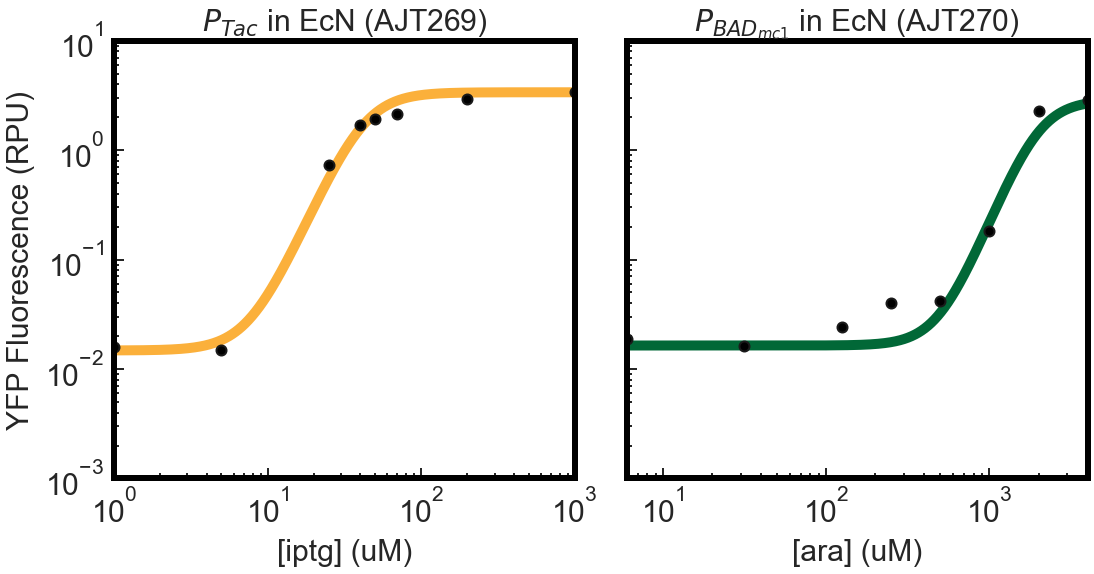

In [87]:
## This one is me making Jai's strategy work with how I already have my data


figRPU2, axRPU2 = plt.subplots(1,2, figsize=(15,7.5), sharey = 'row') # row, column format
plt.tight_layout(pad = 4, h_pad = 4, w_pad = 4) #tidies up spacing between plots

tfs_RPU = dict() # dictionary that eventually contains transfer function information

for m in media:
    tfs_RPU[m] = dict()
    
    for i in inducers:
        tfs_RPU[m][i] = dict()
        for p in parent:
            tfs_RPU[m][i][p] = dict()
            # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file
            strains_subset = [s for s in strains if (len(filtered[filtered['strain_num']==s][i].unique())>1 and
                                                     s in filtered[filtered['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later

            for s in strains_subset:
                if s != 'AJT206' and s != 'AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382': # exclude these because I don't need them
#                 strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']                    ## make borders black (https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib)
                    for spine in axRPU2[fig_pos[m][s]['fig_col']].spines.values():
                        spine.set_edgecolor('black')
                        spine.set_linewidth(6)

                    tfs_RPU[m][i][p][s] = build_transfer_functions([inducer_info[i]['plot_conc']], # x data
                                                      [data_RPU[m][i][p].loc[s].tolist()], # y data; needs to be a list for Jai's stuff
                                                      ['{} in {} ({})'.format(strain_info[s]['promoter'], list(filtered[filtered['strain_num']==s]['parent_strain'].unique())[0], s)]) # name of transfer function                
                    ## scatter
                    # have to get data from tfs[m][i] as [0] because it is a list of lists, which in this case is only 1 list
                    # .inputs and .outputs notation is from Jai's script, which creates objects from what was fed to tf builder
                    axRPU2[fig_pos[m][s]['fig_col']].scatter(tfs_RPU[m][i][p][s][0].inputs, tfs_RPU[m][i][p][s][0].outputs,
                                                                            s = 100, zorder=2, c = 'black',
                                                                            edgecolors = 'k', linewidths = 2)

                    ## fitting line
                    xvals = np.logspace(np.log10(inducer_info[i]['plot_conc'][0]),np.log10(inducer_info[i]['plot_conc'][-1]), 1000) # x values for creating smooth line

                    # tfs[m][i][0].hill_eqn(xvals) outputs y values for hill equation at many x values; 
                    # uses fit parameters from build_transfer_functions module above
                    axRPU2[fig_pos[m][s]['fig_col']].plot(xvals, tfs_RPU[m][i][p][s][0].hill_eqn(xvals), 
                                                                                   color = strain_info[s]['color'],
                                                                                   zorder = 1, linewidth = 10)

                    axRPU2[fig_pos[m][s]['fig_col']].set_yscale('log')
                    axRPU2[fig_pos[m][s]['fig_col']].set_xscale('log')
                    axRPU2[0].set_ylabel('YFP Fluorescence (RPU)', size = 30, labelpad = 10)
                    axRPU2[fig_pos[m][s]['fig_col']].set_xlabel('[{}] (uM)'.format(i), size = 30, labelpad = 10)
                    axRPU2[fig_pos[m][s]['fig_col']].set_title(tfs_RPU[m][i][p][s][0].name, size = 30, pad = 10)
                    axRPU2[fig_pos[m][s]['fig_col']].tick_params(labelsize = 30, length = 10, width = 2, direction = 'in', pad = 10)
                    axRPU2[fig_pos[m][s]['fig_col']].tick_params(which='minor', length = 5, width = 2, direction = 'in')
                    axRPU2[fig_pos[m][s]['fig_col']].set_xlim(inducer_info[i]['plot_conc'][0],inducer_info[i]['plot_conc'][-1])
                    axRPU2[fig_pos[m][s]['fig_col']].set_ylim(0.001,10)
                    axRPU2[fig_pos[m][s]['fig_col']].yaxis.grid(False)
                    axRPU2[fig_pos[m][s]['fig_col']].xaxis.grid(False)

In [86]:
# figRPU2.savefig('/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/2020-08-20_EcN_Ptac_Pbad_AJT269_AJT270_TFs_M9_300minInduction_replicate1/TransferFunctions_all_CAVstyle_darkgrey.pdf', bbox_inches = "tight", transparent = True)


## Hill function output parameters

The following is used for repression equations. x^n goes in the numerator instead of K^n for activation.<br/><br/>
y = promoter activity in RPU<br/>
x = concentration of small molecule<br/>
ymin = leakiness<br/>
K = threshold (sensitivity)<br/>
n = cooperativity

$$ y = y_{min} + (y_{max} - y_{min}) * \frac{x^n}{K^n + x^n}$$

In [74]:
hill_params = dict()
hill_params_df = dict()

for m in media:
    hill_params[m] = dict()
    hill_params_df[m] = dict()
    for i in inducers:
        hill_params[m][i] = dict()
        hill_params_df[m][i] = dict()
        for p in parent:
            hill_params[m][i][p] = dict()
            
            # needed this portion because was pulling strain numbers that weren't corresponding to proper parent strain
            strains_subset = [s for s in strains if (len(filtered[filtered['strain_num']==s][i].unique())>1 and
                                                     s in filtered[filtered['parent_strain']==p]['strain_num'].unique())]
            
            # subset it again to make sure doesn't include white cells or RPU
            strains_subset = [s for s in strains_subset if s!= 'AJT206' and s!= 'AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382'] # exclude these because I don't need them
            
            for s in strains_subset:
                if i == strain_info[s]['inducer']: # to account for if there is more than one inducer
                    hill_params[m][i][p][s] = ({'Promoter': strain_info[s]['promoter'],
                                     'Max inducer (uM)': round(max(tfs_RPU[m][i][p][s][0].inputs), 1),
                                     'ymax (RPU)' : round(max(tfs_RPU[m][i][p][s][0].outputs),1),
                                     'ymin (RPU * 10^-3)' : round(min(tfs_RPU[m][i][p][s][0].outputs)/(1*10**-3),1),
                                     'K (uM)': round(tfs_RPU[m][i][p][s][0].kd, 1), 
                                     'n': round(tfs_RPU[m][i][p][s][0].n, 1),
                                     'fold-change': round((max(tfs_RPU[m][i][p][s][0].outputs))/(min(tfs_RPU[m][i][p][s][0].outputs)),1)})
            hill_params_df[m][i][p] = pd.DataFrame.from_dict(hill_params[m][i][p], orient = 'index')

In [75]:
hill_params_df['M9']['iptg']['EcN']

,Promoter,Max inducer (uM),ymax (RPU),ymin (RPU * 10^-3),K (uM),n,fold-change
AJT269,$P_{Tac}$,1000.0,3.4,14.8,41.9,3.2,228.4


In [77]:
hill_params_df['M9']['ara']['EcN']

,Promoter,Max inducer (uM),ymax (RPU),ymin (RPU * 10^-3),K (uM),n,fold-change
AJT270,$P_{BAD_{mc1}}$,4000.0,2.9,16.4,1983.2,3.7,174.3
